## Loading Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import cv2
import os

## Reading all the images from the file and storing them in array

In [2]:
all_skin_image_files = []

In [3]:
for root, dirs, files in os.walk('./skin_data/'):
  for file in files:
    image_path = os.path.join(root, file)
    image_read = cv2.imread(image_path)
    image_read_to_rgb = cv2.cvtColor(image_read, cv2.COLOR_BGR2RGB)
    all_skin_image_files.append(image_read_to_rgb)

## Calculating the total number of images stored inside the array

In [4]:
print(f'Total number of images: {len(all_skin_image_files)}')

Total number of images: 2000


## Displaying the first 5 images horizontally

In [5]:
first_five_skin_images = all_skin_image_files[:5]

In [6]:
images_disp_in_horizontal_stack = np.hstack(first_five_skin_images)

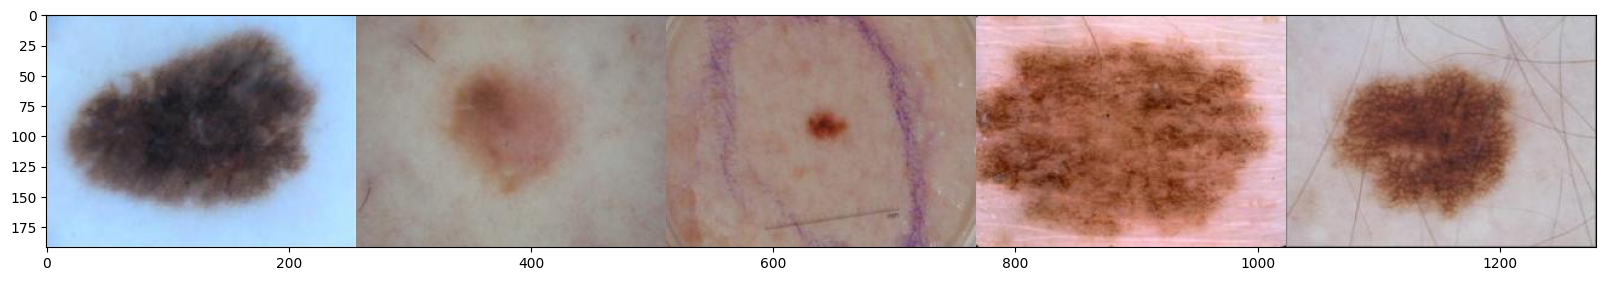

In [7]:
plt.figure(figsize=(20, 10))
plt.imshow(images_disp_in_horizontal_stack)

## Converting all the images into GRAYSCALE and then displaying the first five images horizontally

In [8]:
all_skin_lesion_image_to_gray = []

In [9]:
for image in all_skin_image_files:
    image_to_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    all_skin_lesion_image_to_gray.append(image_to_gray)

In [10]:
all_skin_lesion_image_to_gray_first_five = all_skin_lesion_image_to_gray[:5]

In [11]:
images_disp_in_horizontal_stack = np.hstack(all_skin_lesion_image_to_gray_first_five)

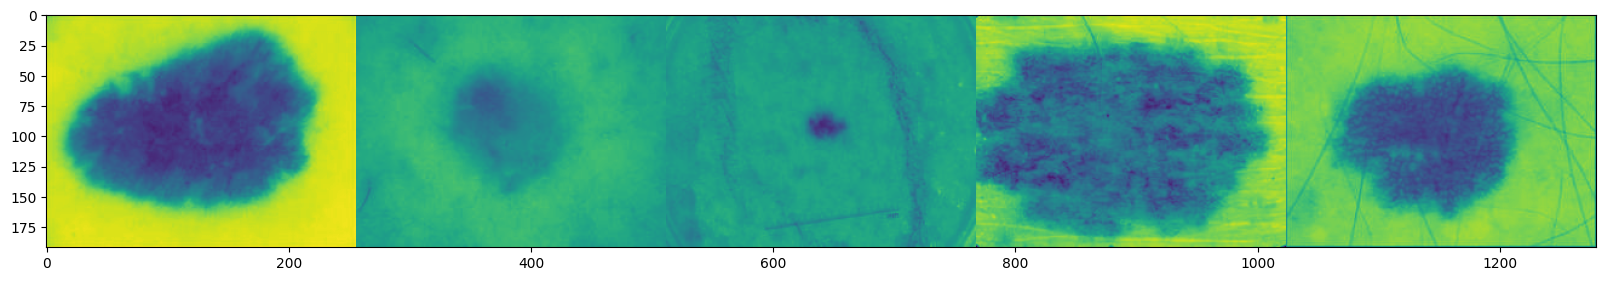

In [12]:
plt.figure(figsize=(20, 10))
plt.imshow(images_disp_in_horizontal_stack)

## Reducing noise in all the images using GaussianBlur and then displaying the first five images horizontally

In [13]:
all_skin_lesion_image_reduce_noise = []

In [14]:
for image in all_skin_lesion_image_to_gray:
    reduce_noise_in_img = cv2.GaussianBlur(image, (5, 5), 0)
    all_skin_lesion_image_reduce_noise.append(reduce_noise_in_img)

In [15]:
all_skin_lesion_image_reduce_noise_first_five = all_skin_lesion_image_reduce_noise[:5]

In [16]:
images_disp_in_horizontal_stack = np.hstack(all_skin_lesion_image_reduce_noise_first_five)

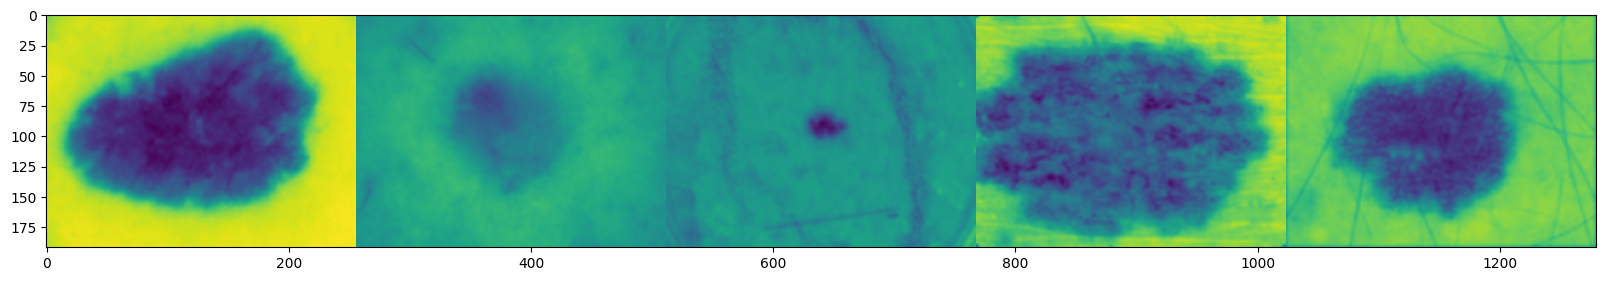

In [17]:
plt.figure(figsize=(20, 10))
plt.imshow(images_disp_in_horizontal_stack)

### After reducing the noise in the images, the images look same as that of the previous ones which simply means that the images are already clean and there is not much noise to reduce in the images.

## Adjusting contrast and brightness of all the images using convertScaleAbs and then displaying the first five images horizontally

In [18]:
all_skin_image_adjust_contrast_and_brightness = []

In [19]:
for image in all_skin_lesion_image_reduce_noise:
    adjust_contrast_in_img = cv2.convertScaleAbs(image, alpha=1.5, beta=20)
    all_skin_image_adjust_contrast_and_brightness.append(adjust_contrast_in_img)

In [20]:
all_skin_image_adjust_contrast_and_brightness_first_five = all_skin_image_adjust_contrast_and_brightness[:5]

In [21]:
images_disp_in_horizontal_stack = np.hstack(all_skin_image_adjust_contrast_and_brightness_first_five)

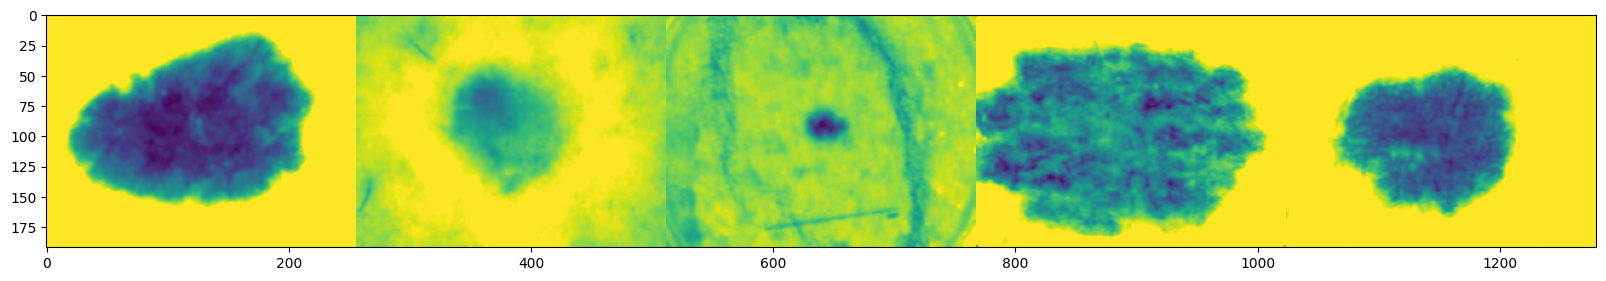

In [22]:
plt.figure(figsize=(20, 10))
plt.imshow(images_disp_in_horizontal_stack)

## Performing Histogram Equalization on all the images and then displaying the first five images horizontally

In [23]:
all_skin_image_equalize_hist = []

In [24]:
for image in all_skin_image_adjust_contrast_and_brightness:
    equalize_hist_in_img = cv2.equalizeHist(image)
    all_skin_image_equalize_hist.append(equalize_hist_in_img)

In [25]:
all_skin_image_equalize_hist = all_skin_image_equalize_hist[:5]

In [26]:
images_disp_in_horizontal_stack = np.hstack(all_skin_image_equalize_hist)

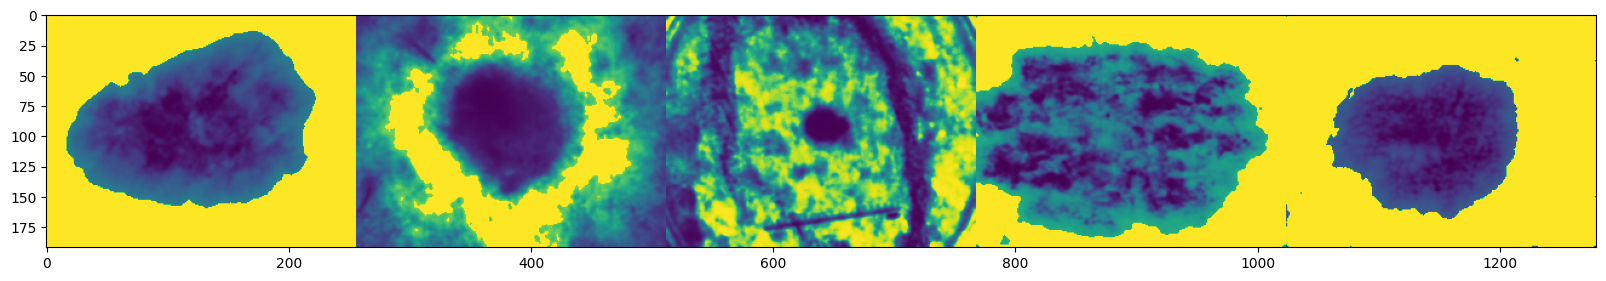

In [27]:
plt.figure(figsize=(20, 10))
plt.imshow(images_disp_in_horizontal_stack)

## Performing Thresholding on all the images and then displaying the first five images horizontally

In [28]:
all_skin_images_threshold = []

In [29]:
for image in all_skin_image_equalize_hist:
    _, thresholding_in_img = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    all_skin_images_threshold.append(thresholding_in_img)

In [30]:
all_skin_images_threshold_first_five = all_skin_images_threshold[:5]

In [31]:
images_disp_in_horizontal_stack = np.hstack(all_skin_images_threshold_first_five)

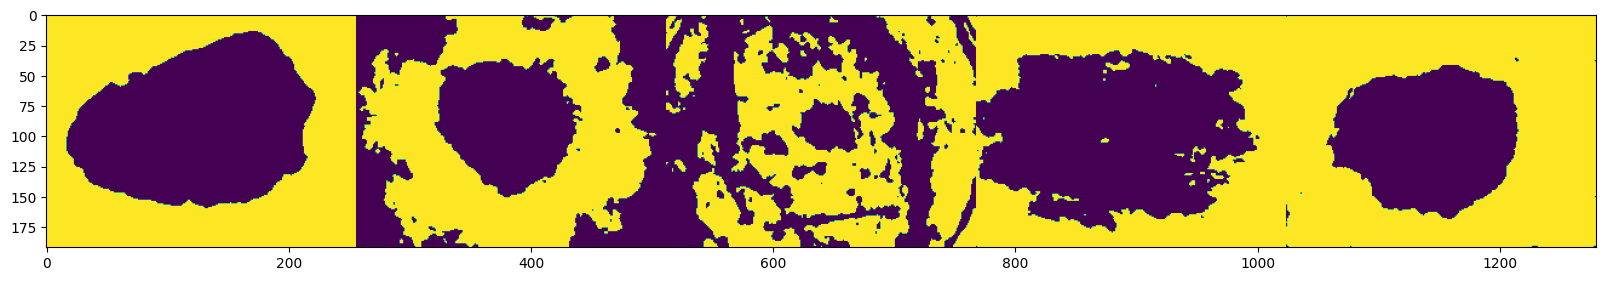

In [32]:
plt.figure(figsize=(20, 10))
plt.imshow(images_disp_in_horizontal_stack)

## Detecting features using SIFT in all the images and then displaying the first five images horizontally

In [33]:
all_skin_images_sift = []

In [34]:
sift = cv2.SIFT_create()

In [35]:
for image in all_skin_images_threshold:
    keypoints, descriptors = sift.detectAndCompute(image, None)
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)
    all_skin_images_sift.append(image_with_keypoints)

In [36]:
all_skin_images_sift_first_five = all_skin_images_sift[:5]

In [37]:
images_disp_in_horizontal_stack = np.hstack(all_skin_images_sift_first_five)

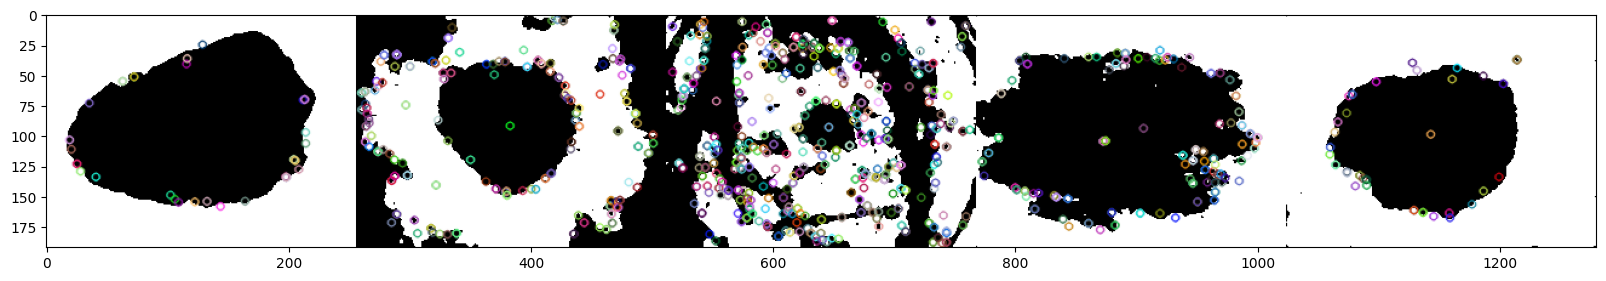

In [38]:
plt.figure(figsize=(20, 10))
plt.imshow(images_disp_in_horizontal_stack)

## Detecting Features using FAST in all the images and then displaying the first five images horizontally

In [39]:
all_skin_images_fast = []

In [40]:
fast = cv2.FastFeatureDetector_create()

In [41]:
for image in all_skin_images_threshold:
    keypoints = fast.detect(image, None)
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 0, 255))
    all_skin_images_fast.append(image_with_keypoints)

In [42]:
all_skin_images_fast_first_five = all_skin_images_fast[:5]

In [43]:
images_disp_in_horizontal_stack = np.hstack(all_skin_images_fast_first_five)

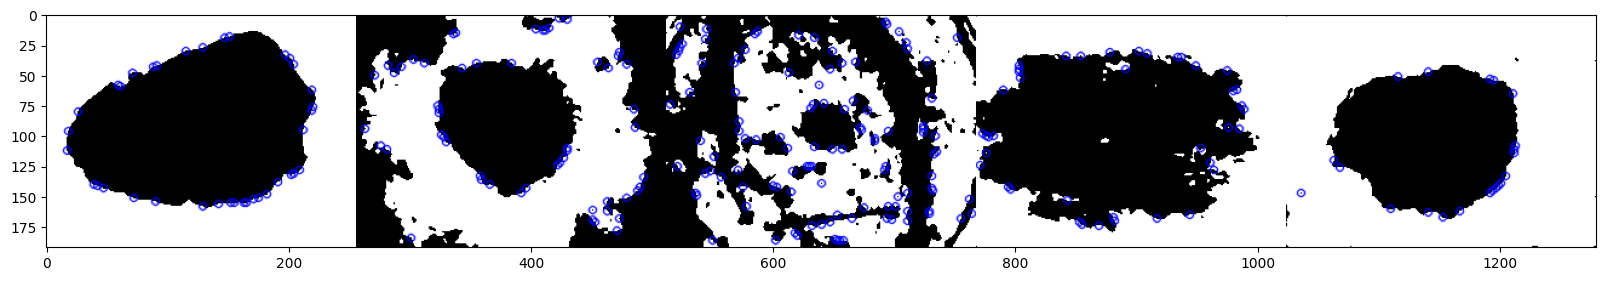

In [44]:
plt.figure(figsize=(20, 10))
plt.imshow(images_disp_in_horizontal_stack)

## Performing BRIEF operation with the help of the any two images

In [45]:
first_image_pos = 0
second_image_pos = 1

In [46]:
img_1 = all_skin_images_threshold[first_image_pos]
img_2 = all_skin_images_threshold[second_image_pos]

In [47]:
brief = cv2.BRISK_create()

In [48]:
fast = cv2.FastFeatureDetector_create()

In [49]:
keypoints1 = fast.detect(img_1, None)
keypoints2 = fast.detect(img_2, None)

In [50]:
keypoints1, descriptors1 = brief.compute(img_1, keypoints1)
keypoints2, descriptors2 = brief.compute(img_2, keypoints2)

In [51]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [52]:
matches = bf.match(descriptors1, descriptors2)

In [53]:
result_img = cv2.drawMatches(img_1, keypoints1, img_2, keypoints2, matches, None)

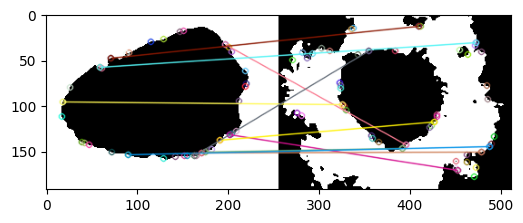

In [54]:
plt.figure(figsize=(6, 3))
plt.imshow(result_img)

## Performing BRIEF with KNN with the help of any two images

In [55]:
good_matches = []

In [56]:
first_image_pos = 0
second_image_pos = 1

In [57]:
img_1 = all_skin_images_threshold[first_image_pos]
img_2 = all_skin_images_threshold[second_image_pos]

In [58]:
brief = cv2.BRISK_create()

In [59]:
fast = cv2.FastFeatureDetector_create()

In [60]:
keypoints1 = fast.detect(img_1, None)
keypoints2 = fast.detect(img_2, None)

In [61]:
bf = cv2.BFMatcher()

In [62]:
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

In [63]:
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        good_matches.append(m)

In [64]:
result_img = cv2.drawMatches(img_1, keypoints1, img_2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

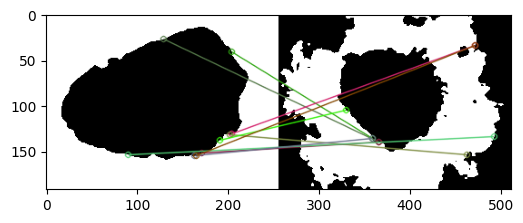

In [65]:
plt.figure(figsize=(6, 3))
plt.imshow(result_img)

## Detecting Features in all the images using ORB and then displaying the first five images

In [66]:
all_skin_images_orb = []

In [67]:
orb = cv2.ORB_create()

In [68]:
for image in all_skin_images_threshold:
    keypoints, descriptors = orb.detectAndCompute(image, None)
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))
    all_skin_images_orb.append(image_with_keypoints)

In [69]:
all_skin_images_orb_first_five = all_skin_images_orb[:5]

In [70]:
images_disp_in_horizontal_stack = np.hstack(all_skin_images_orb_first_five)

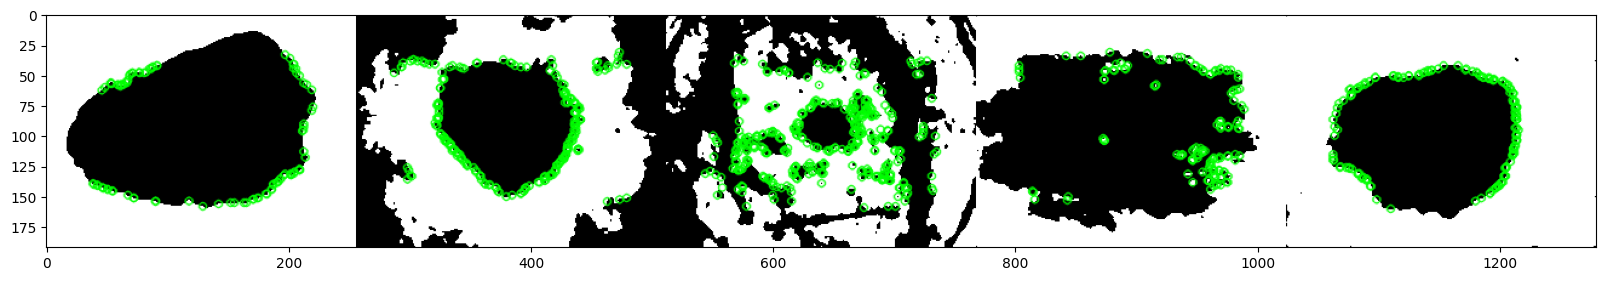

In [71]:
plt.figure(figsize=(20, 10))
plt.imshow(images_disp_in_horizontal_stack)

## Performing Contour Segmentation and then displaying the first five images

In [72]:
all_skin_images_contour = []

In [73]:
for image in all_skin_images_threshold:
    blurred = cv2.GaussianBlur(image, (11, 11), 0)
    edges = cv2.Canny(blurred, 75, 200)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros_like(image)
    img_contours = cv2.drawContours(mask, contours, -1, 255, thickness=cv2.FILLED)
    all_skin_images_contour.append(img_contours)

In [74]:
all_skin_images_contour_first_five = all_skin_images_contour[:5]

In [75]:
images_disp_in_horizontal_stack = np.hstack(all_skin_images_contour_first_five)

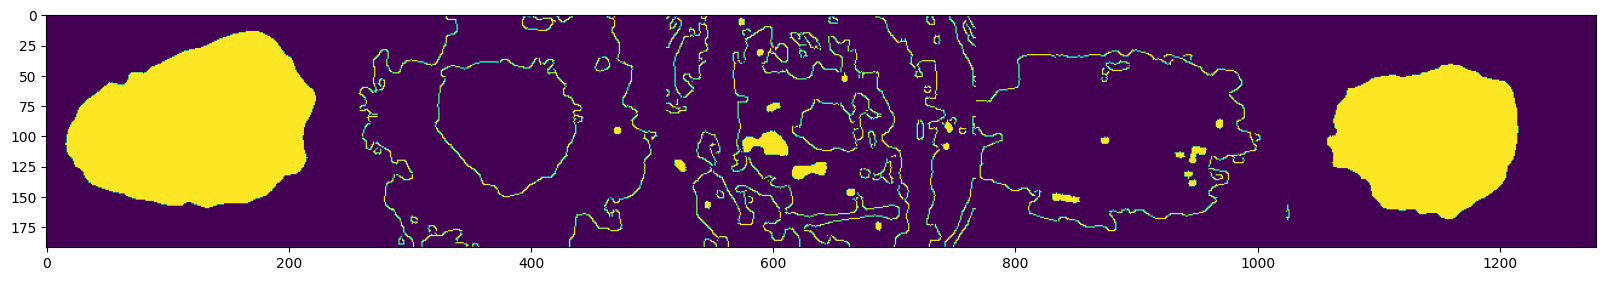

In [76]:
plt.figure(figsize=(20, 10))
plt.imshow(images_disp_in_horizontal_stack)

## Original Skin Images(First Five) VS Segmented Images with Feature Detection(First Five) VS Contour Images(First FIve)

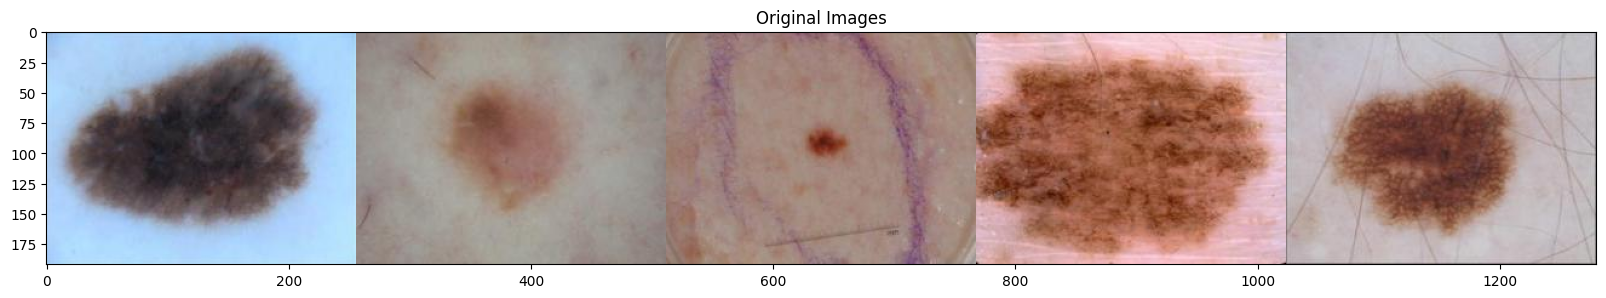

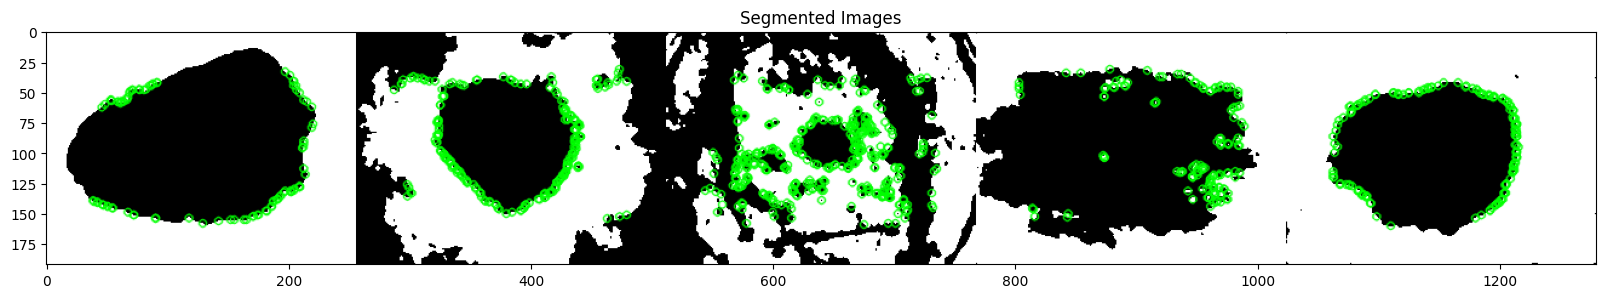

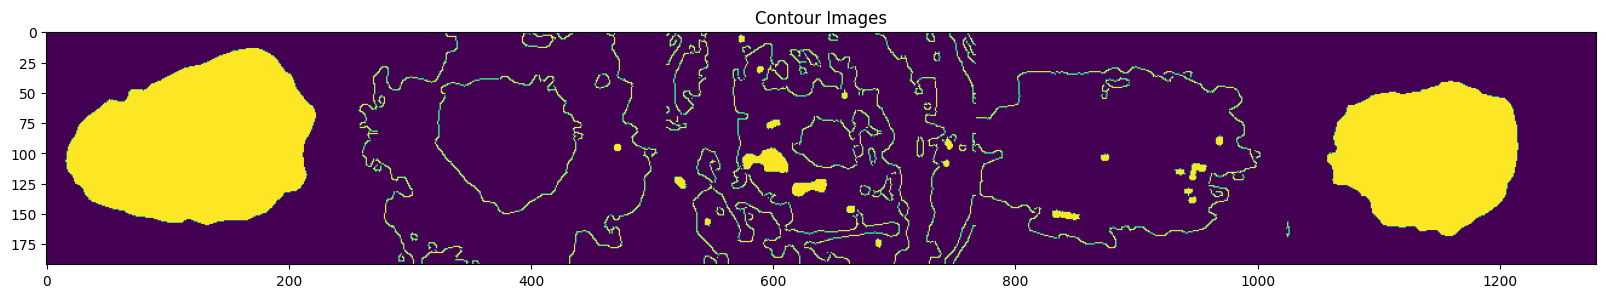

In [77]:
original_images_disp_in_horizontal_stack = np.hstack(first_five_skin_images)
plt.figure(figsize=(20, 10))
plt.title('Original Images')
plt.imshow(original_images_disp_in_horizontal_stack)

print()

segmented_images_disp_in_horizontal_stack = np.hstack(all_skin_images_orb_first_five)
plt.figure(figsize=(20, 10))
plt.title('Segmented Images')
plt.imshow(segmented_images_disp_in_horizontal_stack)

print()

segmented_images_disp_in_horizontal_stack = np.hstack(all_skin_images_contour_first_five)
plt.figure(figsize=(20, 10))
plt.title('Contour Images')
plt.imshow(segmented_images_disp_in_horizontal_stack)